In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\EDGAR MUYALE DAVIES\\Downloads\\Mens_Boston_Marathon_Winners.csv")

In [3]:
df.head()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
0,1897.0,John McDermott,United States,02:55:10,24.5,39.4
1,1898.0,Ronald MacDonald,Canada,02:42:00,24.5,39.4
2,1899.0,Lawrence Brignolia,United States,02:54:38,24.5,39.4
3,1900.0,Jack Caffery,Canada,02:39:44,24.5,39.4
4,1901.0,Jack Caffery,Canada,02:29:23,24.5,39.4


In [4]:
df.isnull().sum()
# The null values are for the years that the marathon never relly took place e.g in 2020 due to covid

Year                2
Winner              2
Country             2
Time                2
Distance (Miles)    2
Distance (KM)       2
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Year                0
Winner              0
Country             0
Time                0
Distance (Miles)    0
Distance (KM)       0
dtype: int64

In [7]:
df.describe()
# The marathon distances range from 39 km to 42 km

,Year,Distance (Miles),Distance (KM)
count,124.000000,124.000000,124.000000
mean,1959.346774,25.816935,41.569355
std,36.213245,0.689494,1.135114
min,1897.000000,24.500000,39.400000
25%,1928.750000,25.700000,41.400000
50%,1959.500000,26.200000,42.200000
75%,1990.250000,26.200000,42.200000
max,2022.000000,26.200000,42.200000


In [8]:
df.columns

Index(['Year', 'Winner', 'Country', 'Time', 'Distance (Miles)',
       'Distance (KM)'],
      dtype='object')

In [9]:
df['Distance (KM)'].value_counts().head()

42.2    89
39.4    26
41.4     6
42.0     3
Name: Distance (KM), dtype: int64

In [10]:
# Correlation in our dataset
correlation = df.corr()

In [11]:
correlation

,Year,Distance (Miles),Distance (KM)
Year,1.00000,0.723690,0.724580
Distance (Miles),0.72369,1.000000,0.999978
Distance (KM),0.72458,0.999978,1.000000


In [12]:
df.dtypes.T

Year                float64
Winner               object
Country              object
Time                 object
Distance (Miles)    float64
Distance (KM)       float64
dtype: object

In [13]:
df['Time'].nunique()

121

# DATA ANALYSIS : EDA + FEATURE ENGINEERING

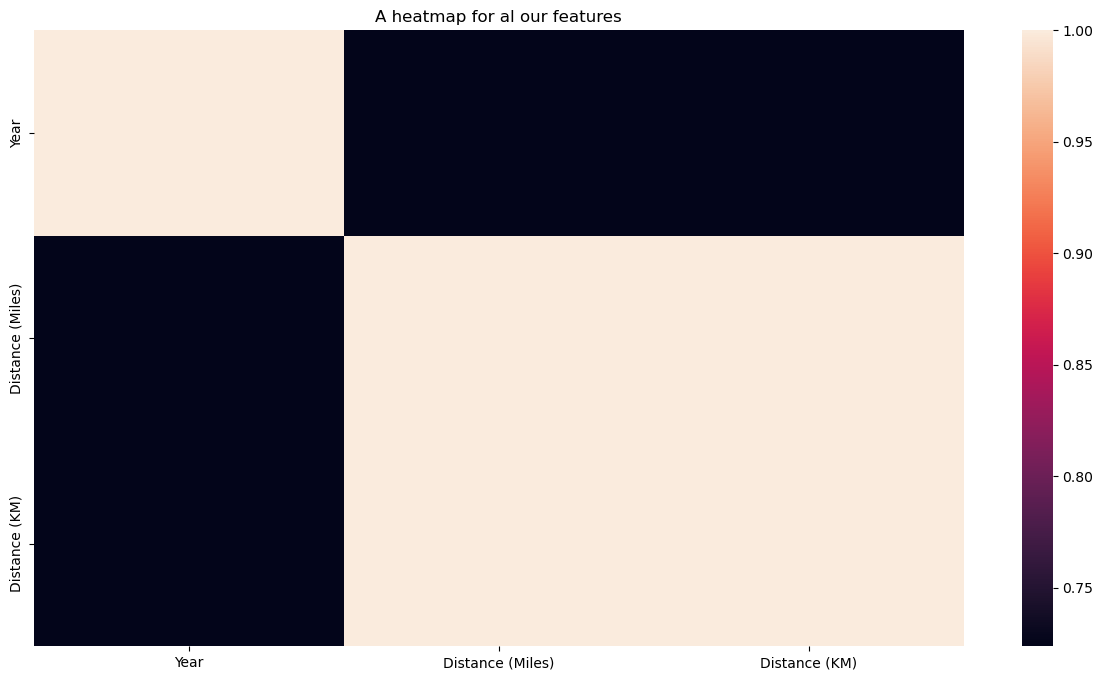

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation)
plt.title('A heatmap for al our features')
plt.show()

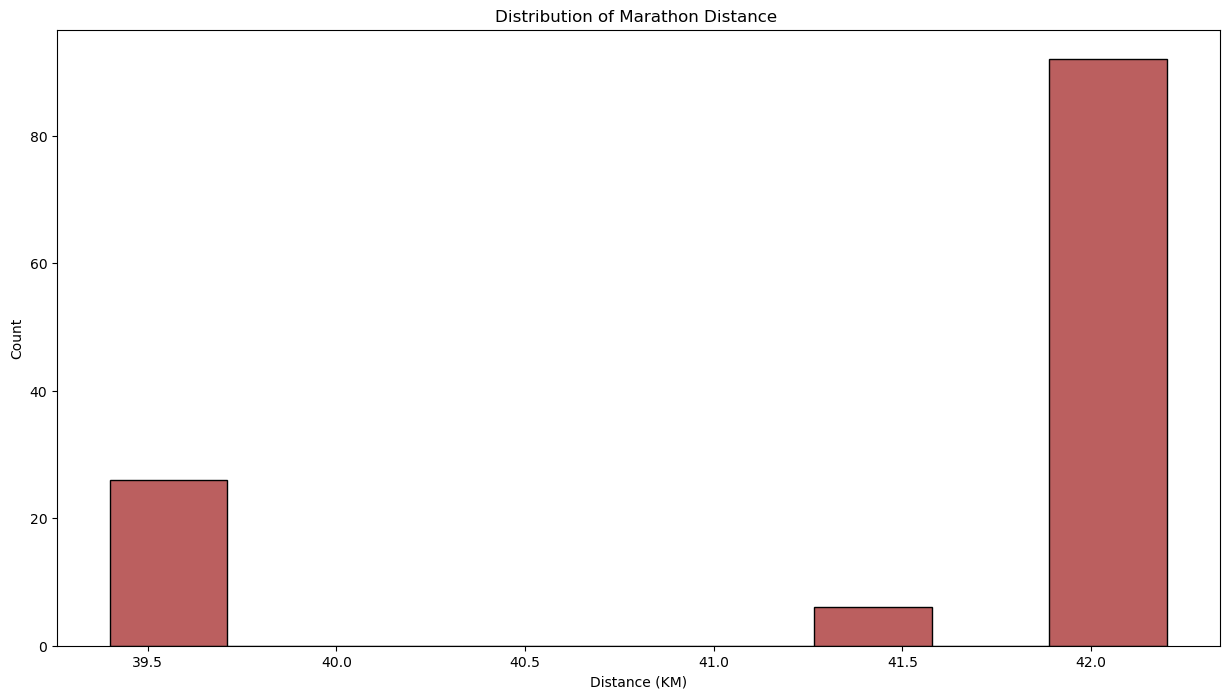

In [15]:
# Distances distribution
plt.figure(figsize=(15,8))
sns.histplot(x = 'Distance (KM)',data=df,color='brown')
plt.title('Distribution of Marathon Distance ')
plt.show()
# Majority of the winners covered 42 km 

In [16]:
x = df.groupby('Time')['Distance (KM)'].agg('mean')

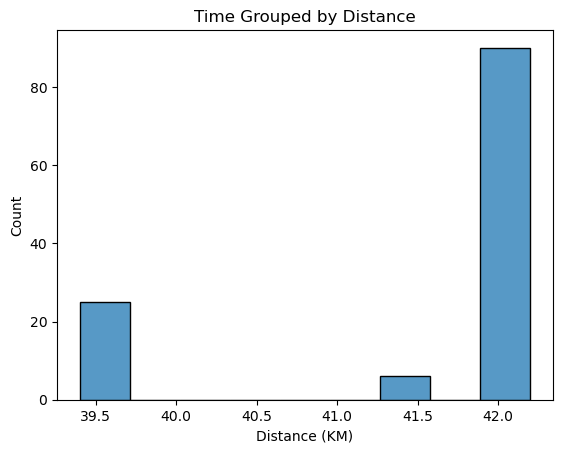

In [17]:
sns.histplot(x)
plt.title('Time Grouped by Distance')
plt.show()

In [18]:
import datetime
#df['Year'] = pd.to_datetime(df['Year'])
df['Time'] = pd.to_datetime(df['Time'])

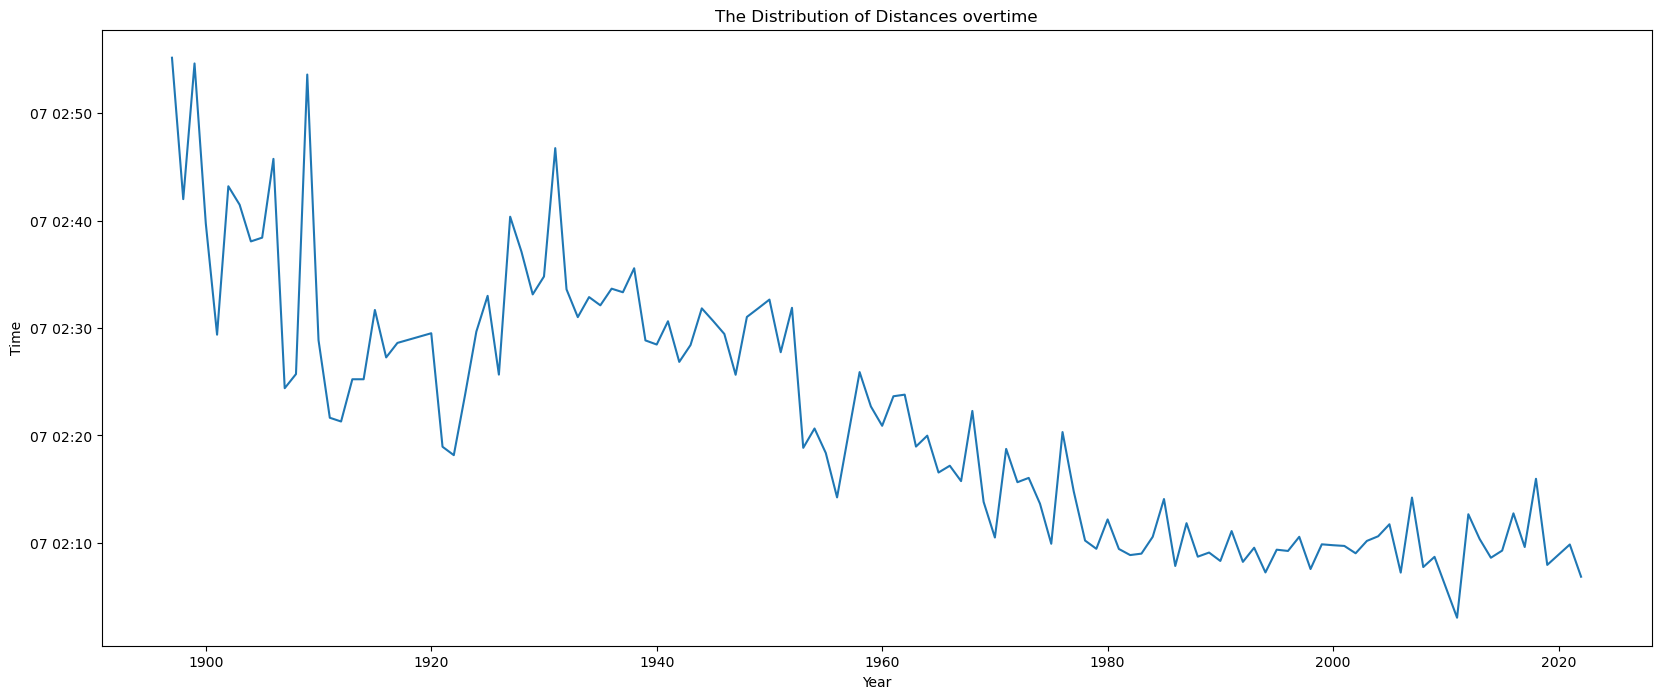

In [20]:
# Distribution of Distances over time
plt.figure(figsize=(20,8))
sns.lineplot(x='Year',y='Time',data=df)
plt.title('The Distribution of Distances overtime')
plt.show()
# Over the past few years ,less time has been used and these are world records : A definition of a wr is less time spent winning

In [21]:
df.columns

Index(['Year', 'Winner', 'Country', 'Time', 'Distance (Miles)',
       'Distance (KM)'],
      dtype='object')

In [25]:
df['Winner'].value_counts().head(17)
# Clarence Demar has won a couple of times : 7 and the highest

Clarence DeMar               7
Bill Rodgers                 4
Gérard Côté                  4
Robert Kipkoech Cheruiyot    4
Eino Oksanen                 3
Ibrahim Hussein              3
Les Pawson                   3
Cosmas Ndeti                 3
Johnny Kelley                2
Toshihiko Seko               2
Lelisa Desisa                2
Jack Caffery                 2
Geoff Smith                  2
Johnny Miles                 2
Moses Tanui                  2
Ellison Brown                2
Aurèle Vandendriessche       2
Name: Winner, dtype: int64

# WINNERS BY ANALYSIS : COUNTRY ,TIME AND DISTANCE

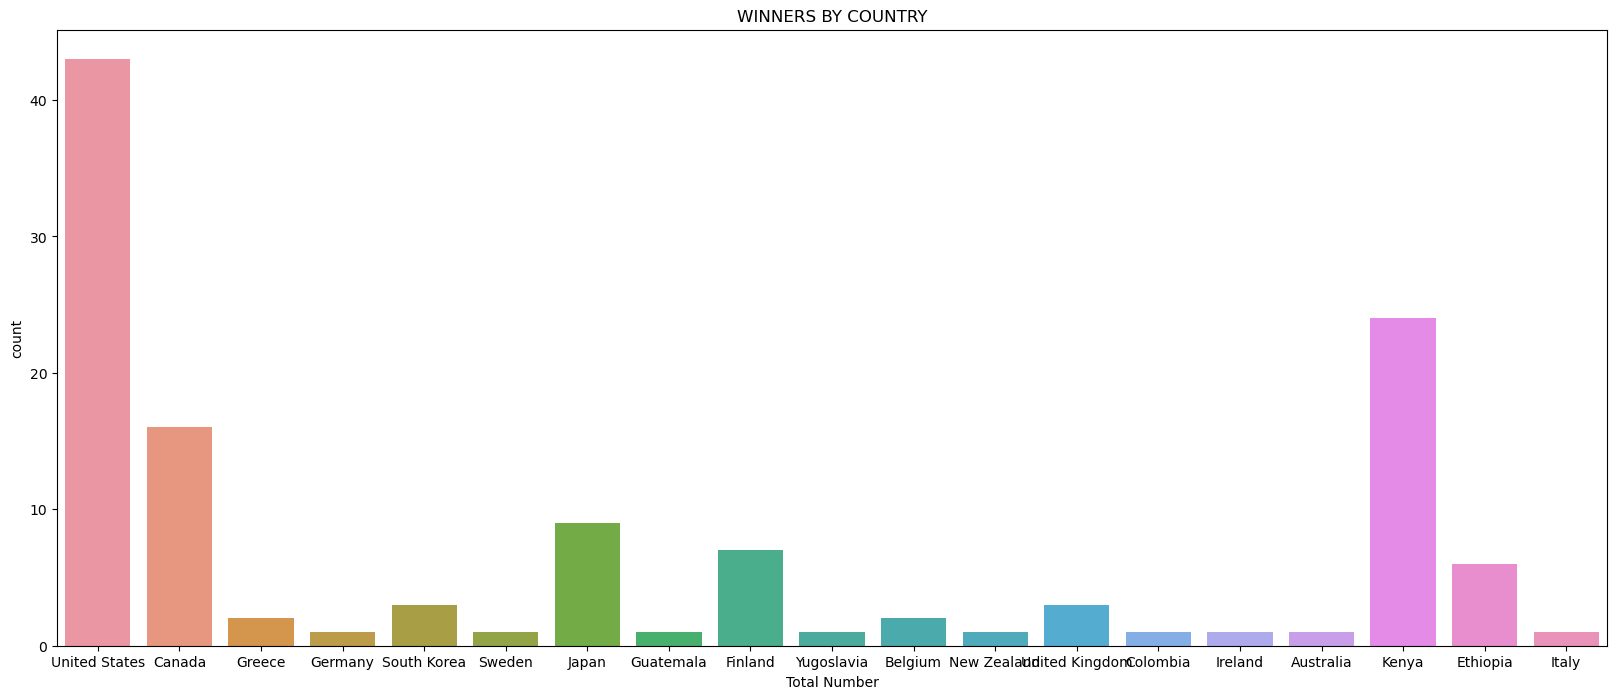

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(x='Country',data=df)
plt.xlabel("Total Number")
plt.title('WINNERS BY COUNTRY')
plt.show()
# USA HAS WON THE MOST NUMBER OF TIMES ,FOLLOWED CLOSELY BY KENYA AND CANADA::)

In [53]:
df.groupby('Country')['Time'].agg('mean').sort_values(ascending=True)

Country
Australia        2023-05-07 02:07:51.000000000
Italy            2023-05-07 02:08:19.000000000
Kenya            2023-05-07 02:09:00.291666688
Ethiopia         2023-05-07 02:10:19.333333248
United Kingdom   2023-05-07 02:11:42.999999744
Ireland          2023-05-07 02:13:39.000000000
New Zealand      2023-05-07 02:15:45.000000000
Japan            2023-05-07 02:16:38.333333248
Colombia         2023-05-07 02:18:45.000000000
Belgium          2023-05-07 02:19:28.500000000
Finland          2023-05-07 02:20:13.571428608
South Korea      2023-05-07 02:22:40.333333248
Yugoslavia       2023-05-07 02:25:54.000000000
United States    2023-05-07 02:28:33.860465152
Greece           2023-05-07 02:29:29.000000000
Canada           2023-05-07 02:30:03.124999936
Sweden           2023-05-07 02:31:50.000000000
Guatemala        2023-05-07 02:31:53.000000000
Germany          2023-05-07 02:33:36.000000000
Name: Time, dtype: datetime64[ns]

In [55]:
df.groupby('Distance (KM)')['Time'].agg('mean').sort_values(ascending=True)
# As time progresses ,more distance was added on the track : less time was used to win the marathons

Distance (KM)
42.2   2023-05-07 02:17:49.213483264
41.4   2023-05-07 02:21:57.333333248
42.0   2023-05-07 02:29:26.666666752
39.4   2023-05-07 02:33:07.000000000
Name: Time, dtype: datetime64[ns]

SOME GREAT INSIGHTS : USA AND KENYA ARE ALL TIME GREATS .AS WE PROGRESS MORE ,MORE RECORDS ARE BEING SET

# THE END ::_))